<a href="https://colab.research.google.com/github/MEMEO-PRO/Cat-vs-dog-CNN-model/blob/main/cats_VS_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
    
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
    
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# CNN model
# 3 conv layers--1- 32 filters , 2-64 filters, 3-128 filters

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.2440 - accuracy: 0.6062 - val_loss: 0.6178 - val_accuracy: 0.6880
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5661 - accuracy: 0.7093 - val_loss: 0.6113 - val_accuracy: 0.6186
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4910 - accuracy: 0.7537 - val_loss: 0.4740 - val_accuracy: 0.7678
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4628 - accuracy: 0.7786 - val_loss: 0.5389 - val_accuracy: 0.7076
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3988 - accuracy: 0.8120 - val_loss: 0.4516 - val_accuracy: 0.7856
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3557 - accuracy: 0.8342 - val_loss: 0.5714 - val_accuracy: 0.7260
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2984 - accuracy: 0.8640 - val_loss: 0.4834 - val_ac

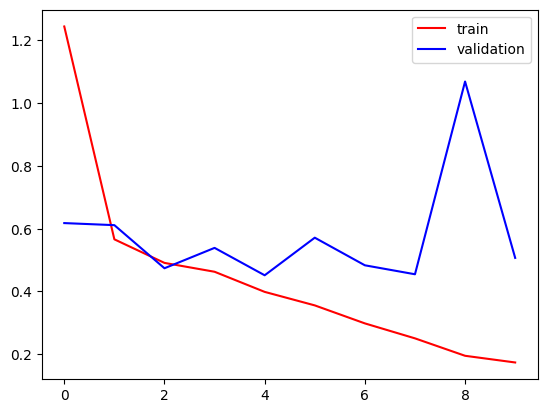

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()